# "50 startups."

### _"Predict which companies to invest for maximizing profit" (Regression task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

    
**Метаданные:**
    
* **ID** - startup ID

* **R&D Spend** - how much each startup spends on Research and Development

* **Administration** - how much they spend on Administration cost

* **Marketing Spend** - how much they spend on Marketing

* **State** - which state the startup is based in

* **Category** - which business category the startup belong to

* **Profit** - the profit made by the startup
   

### Questions:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

* ### Import 

In [36]:
# import standard libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
from scipy import stats                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

* ### Load Data

In [37]:
# read data from '.csv' files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# identify target
target = train['Profit']


## Part 2: Exploratory Data Analysis.

* ### Info

In [38]:
# print the full summary of the Train dataset
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [39]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head

In [40]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category,Profit
0,0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [41]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State,Category
0,0,165349.20,136897.80,471784.10,New York,Industrials
1,1,162597.70,151377.59,443898.53,California,Technology
2,2,153441.51,101145.55,407934.54,Florida,Healthcare
3,3,144372.41,118671.85,383199.62,New York,Financials
4,4,142107.34,91391.77,366168.42,Florida,Industrials


* ### Observation of target variable

In [42]:
# target variable
train['Profit'].describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

<Axes: xlabel='Profit', ylabel='Count'>

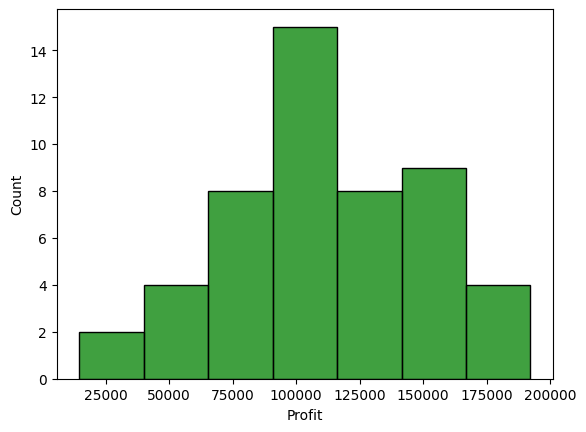

In [43]:
# visualisation of 'Profit' distribution  
# В оригинале distplot, но эта функция будет удалена в новой версии SNS
# Замена на histplot
sns.histplot(train['Profit'], color='g')

In [28]:
# set 'ID' to index
train = train.set_index('ID')
test = test.set_index('ID')

* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [44]:
# check for Numerical and Categorical features in Train
numerical_feats_train = train.dtypes[train.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats_train))
print ()
print (train[numerical_feats_train].columns)
print ()
categorical_feats_train = train.dtypes[train.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats_train))
print ()
print (train[categorical_feats_train].columns)

Quantity of Numerical features:  5

Index(['ID', 'R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

Quantity of Categorical features:  2

Index(['State', 'Category'], dtype='object')


* ### Missing values

#### List of data features with missing values

In [45]:
# check the Train features with missing values 
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 50 rows.")
nan_columns

ID                 0
R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64

There are 3 columns with NAN values for 50 rows.


['R&D Spend', 'Marketing Spend', 'Category']

In [46]:
# check the Test features with missing values
nan_columns = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum())
print()
print("There are " + str(len(nan_columns)) +" columns with NAN values for 50 rows.")
nan_columns

ID                 0
R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64

There are 3 columns with NAN values for 50 rows.


['R&D Spend', 'Administration', 'State']

#### Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

* 'R&D Spend': Numerical - replacement of NAN by 'mean';
* 'Administration': Numerical - replacement of NAN by 'mean';
* 'Marketing Spend': Numerical - replacement of NAN by 'mean';
* 'State': Categorical - replacement of NAN by 'None';
* 'Category': Categorical - replacement of NAN by 'None'.

In [55]:
#Numerical NAN columns to fill in Train and Test datasets
nan_columns_fill = [
    'R&D Spend',
    'Administration',
    'Marketing Spend'
    ]

# replace 'NAN' with 'mean' in these columns
#вот так для одного столбца
#train['R&D Spend'].fillna(train['R&D Spend'].mean(), inplace = True)
#починил для всех столбцов

for col in nan_columns_fill :
    train[col].fillna(train[col].mean(), inplace = True)  
    test[col].fillna(test[col].mean(), inplace = True)
    

# Categorical NAN columns to fill in Train and Test datasets
na_columns_fill = [
    'State', 
    'Category'
    ]

# replace 'NAN' with 'None' in these columns
for col in na_columns_fill:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

In [56]:
# check is there any mising values left in Train
train.isnull().sum().sum()

0

In [57]:
# check is there any mising values left in Test
test.isnull().sum().sum()

0

#### Visualisation  of Numerical features (regplot)

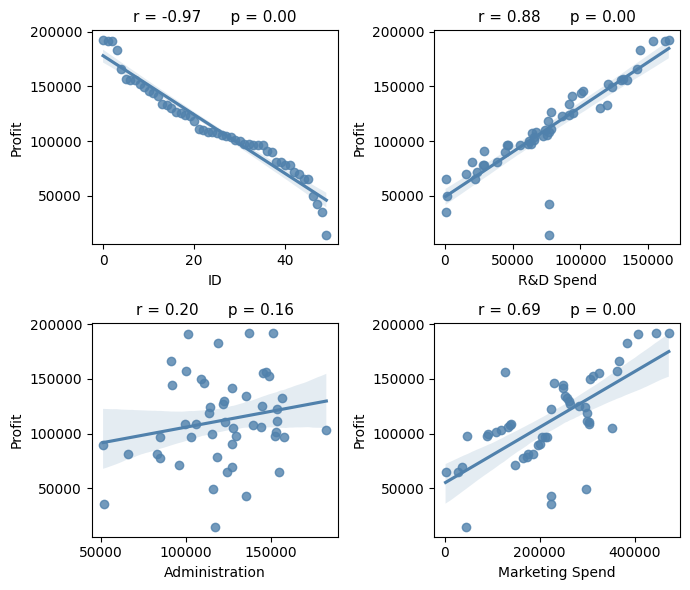

In [60]:
# numerical features visualisation
# поправил ошибку в sns.regplot (надо явно указывать переменные x и y)
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

num_feats = list(numerical_feats_train)
not_plot = ['Id',  'Profit']
plot_num_feats = [c for c in list(numerical_feats_train) if c not in not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(x=train[plot_num_feats[i]], y=train['Profit'], ax = axs[r][c], color = "#5081ac" )
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
          
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title, fontsize=11)



plt.tight_layout()    
plt.show()

<Axes: xlabel='State', ylabel='Profit'>

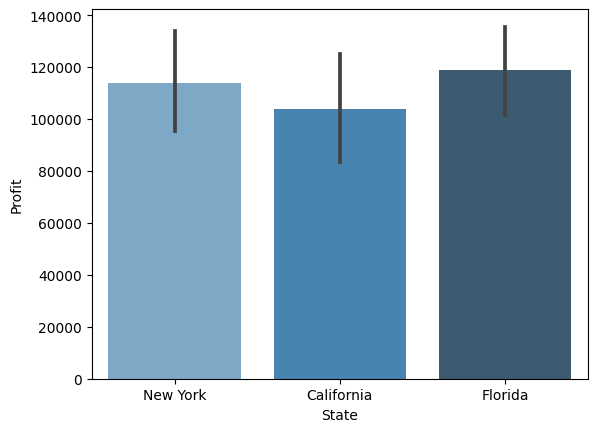

In [61]:
# categorical features visualisation
# 'Profit' split in 'State' level
sns.barplot(x = 'State', y = 'Profit', data = train, palette = "Blues_d")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Financials'),
  Text(4, 0, 'Telecommunications'),
  Text(5, 0, 'None'),
  Text(6, 0, 'Oil & Gas')])

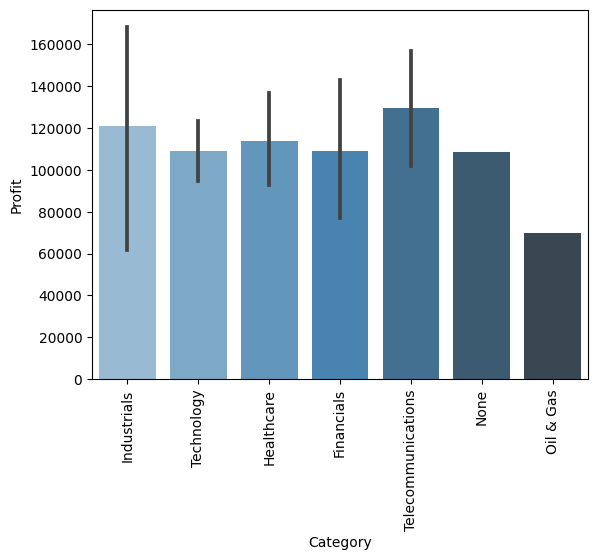

In [62]:
# categorical features visualisation
# 'Profit' split in 'Category' level
sns.barplot(x = 'Category', y = 'Profit', data = train, palette = "Blues_d")
plt.xticks(rotation=90)

## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [63]:
# One-Hot Encoding Train dataset
train = pd.get_dummies(train,columns=['State', 'Category'])

# Drop target variable 
train = train.drop(columns=['Profit'])


In [64]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,ID,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
0,0,165349.20,136897.80,471784.10,False,False,True,False,False,True,False,False,False,False
1,1,162597.70,151377.59,443898.53,True,False,False,False,False,False,False,False,True,False
2,2,153441.51,101145.55,407934.54,False,True,False,False,True,False,False,False,False,False
3,3,144372.41,118671.85,383199.62,False,False,True,True,False,False,False,False,False,False
4,4,142107.34,91391.77,366168.42,False,True,False,False,False,True,False,False,False,False


In [65]:
# Train data shape
train.shape

(50, 14)

In [66]:
# One Hot-Encoding Test dataset
test = pd.get_dummies(test,columns=['State', 'Category'])

In [67]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,ID,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
0,0,165349.20,136897.80,471784.10,False,False,True,False,False,False,True,False,False,False
1,1,162597.70,151377.59,443898.53,True,False,False,False,False,False,False,False,True,False
2,2,153441.51,101145.55,407934.54,False,True,False,False,False,True,False,False,False,False
3,3,144372.41,118671.85,383199.62,False,False,True,False,True,False,False,False,False,False
4,4,142107.34,91391.77,366168.42,False,True,False,False,False,False,True,False,False,False


In [68]:
# Test data shape
test.shape

(50, 14)

In [69]:
# Drop unnecessary variables 
train = train.drop(columns=['Category_None'])
test = test.drop(columns=['State_None'])

* ### StandardScaler

In [70]:
#можно пропустить
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_train = sc.fit_transform(train)
sc_test = sc.transform(test)

In [71]:
#можно пропустить
sc_train = pd.DataFrame(sc_train)
sc_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.697749,2.065354,0.560753,2.275193,-0.717741,-0.685994,1.393261,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884
1,-1.628453,2.001182,1.082807,2.018631,1.393261,-0.685994,-0.717741,-0.369274,-0.531085,-0.333333,-0.142857,1.128152,-0.294884
2,-1.559158,1.787635,-0.728257,1.687743,-0.717741,1.457738,-0.717741,-0.369274,1.882938,-0.333333,-0.142857,-0.886405,-0.294884
3,-1.489862,1.576120,-0.096365,1.460169,-0.717741,-0.685994,1.393261,2.708013,-0.531085,-0.333333,-0.142857,-0.886405,-0.294884
4,-1.420566,1.523293,-1.079919,1.303473,-0.717741,1.457738,-0.717741,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884


In [72]:
#можно пропустить
sc_test = pd.DataFrame(sc_test)
sc_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.697749,2.065354,0.560753,2.275193,-0.717741,-0.685994,1.393261,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884
1,-1.628453,2.001182,1.082807,2.018631,1.393261,-0.685994,-0.717741,-0.369274,-0.531085,-0.333333,-0.142857,1.128152,-0.294884
2,-1.559158,1.787635,-0.728257,1.687743,-0.717741,1.457738,-0.717741,-0.369274,1.882938,-0.333333,-0.142857,-0.886405,-0.294884
3,-1.489862,1.576120,-0.096365,1.460169,-0.717741,-0.685994,1.393261,2.708013,-0.531085,-0.333333,-0.142857,-0.886405,-0.294884
4,-1.420566,1.523293,-1.079919,1.303473,-0.717741,1.457738,-0.717741,-0.369274,-0.531085,3.000000,-0.142857,-0.886405,-0.294884


* ### Creating datasets for ML part

In [73]:
# #можно пропустить
# # set 'X' for features of scaled Train dataset 'sc_train'
# X = sc_train

# # set 'y' for the target 'Profit'
# y = target

# # 'X_Test' for features of scaled Test dataset 'sc_test'
# X_Test = sc_test

In [74]:
# set 'X' for features of scaled Train dataset 'sc_train'
X = train

# set 'y' for the target 'Profit'
y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
X_Test = test

* ### 'Train\Test' split

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [77]:
X_train.shape

(35, 13)

In [78]:
X_test.shape

(15, 13)

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [79]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train,y_train)

# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred


array([ 99150.28943149, 153395.76572476, 153106.61029677,  65527.48614624,
       174006.92084148, 104814.9185002 ,  76354.38318637,  83094.1298935 ,
       120253.48311932, 159596.08467075,  86134.43036443,  81495.52197738,
       104457.7456807 ,  81087.58525872, 129026.29480439])

In [80]:

# Model R2 score
LRscore = LR.score(X_test, y_test)

In [81]:
# Model Metrics
LRMetrics = pd.DataFrame({'Model': 'Linear Regression',
                          'r2score':r2_score(y_test,LR_pred),
                          'MAE': metrics.mean_absolute_error (y_test,LR_pred),
                          'MSE': metrics.mean_squared_error(y_test,LR_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,LR_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,LR_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,LR_pred))             
                          },index=[1])

LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.891634,8853.826533,1.045995e+08,10227.391264,0.01059,0.102908


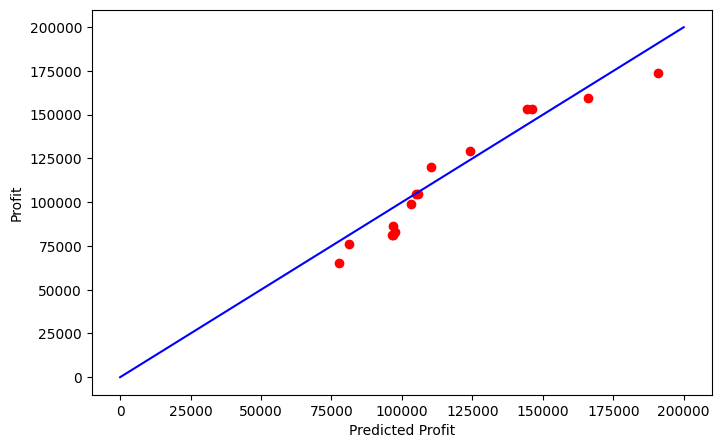

In [82]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y_test, LR_pred,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [83]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1  

array([171030.6547499 , 179425.94749851, 174006.92084148, 170088.23475372,
       159596.08467075, 158453.92988734, 156233.05399437, 158809.56029329,
       158657.43453987, 159094.34298815, 153101.02452577, 153395.76572476,
       146656.16875042, 140619.62940693, 137720.13049355, 135870.96128645,
       140056.52410568, 132157.83934513, 129026.29480439, 126544.6142118 ,
       129056.16074296, 121218.35179015, 120253.48311932, 116487.01823778,
       112473.44253122, 105830.98611829, 104457.7456807 , 104814.9185002 ,
       100801.1955651 ,  95898.90932478,  94625.64642605,  83094.1298935 ,
        90789.81520958,  86134.43036443,  81087.58525872,  81495.52197738,
        79728.79433018,  79333.05671978,  76354.38318637,  72910.07031914,
        73598.28426617,  65527.48614624,  67146.63172514,  69758.98      ,
        58340.54162777,  54888.43178957,  52536.99970652,  44825.99394056,
        45314.61886968,  29600.29584317])

In [84]:
# Model Metrics
LRMetrics1 = pd.DataFrame({'Model': 'Linear Regression',
                           'r2score':r2_score(y,LR_pred1),
                           'MAE': metrics.mean_absolute_error (y,LR_pred1),
                           'MSE': metrics.mean_squared_error(y,LR_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,LR_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,LR_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,LR_pred1))             
                           },index=[1])

LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.949405,7605.822244,8.055195e+07,8975.073859,0.017708,0.133073


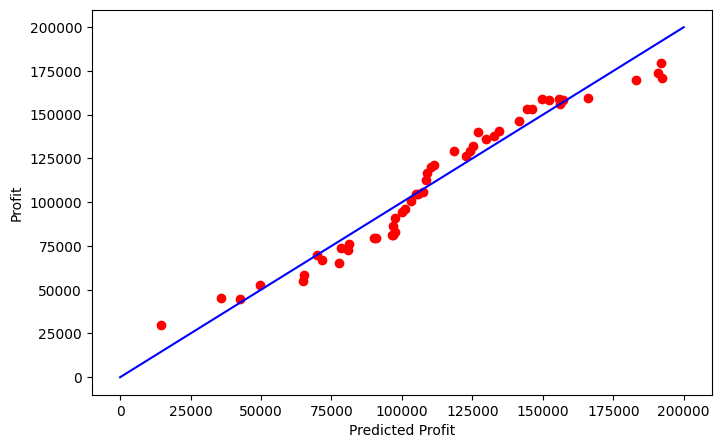

In [85]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, LR_pred1,'ro')
pl.plot([0,200000],[0,200000],'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

In [87]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1 })
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit
0,192261.830000,171030.654750
1,191792.060000,179425.947499
2,191050.390000,174006.920841
3,182901.990000,170088.234754
4,166187.940000,159596.084671
5,156991.120000,158453.929887
6,156122.510000,156233.053994
7,155752.600000,158809.560293
8,152211.770000,158657.434540
9,149759.960000,159094.342988


* #### Gradient Boosting Regressor

In [88]:
# Gradient Boosting Regressor model
GB=GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train,y_train)

# Model Prediction
GB_pred = GB.predict(X_test)

# Model R2 score
GBscore =GB.score(X_test, y_test)


In [89]:
# Model Metrics
GBMetrics = pd.DataFrame({'Model': 'Gradient Boosting Regressor',
                          'r2score':r2_score(y_test,GB_pred),
                          'MAE': metrics.mean_absolute_error (y_test,GB_pred),
                          'MSE': metrics.mean_squared_error(y_test,GB_pred),
                          'RMSE': np.sqrt(metrics.mean_squared_error(y_test,GB_pred)),
                          'MSLE': metrics.mean_squared_log_error(y_test,GB_pred),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,GB_pred))             
                          },index=[2])

GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
2,Gradient Boosting Regressor,0.982158,3293.04765,1.722179e+07,4149.914387,0.001392,0.037314


In [90]:
# Test final predictions
GB_pred1 = GB.predict(X_Test)

In [91]:
# Model Metrics
GBMetrics1 = pd.DataFrame({'Model': 'GradientBoostingRegressor',
                           'r2score':r2_score(y,GB_pred1),
                           'MAE': metrics.mean_absolute_error (y,GB_pred1),
                           'MSE': metrics.mean_squared_error(y,GB_pred1),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y,GB_pred1)),
                           'MSLE': metrics.mean_squared_log_error(y,GB_pred1),
                           'RMSLE':np.sqrt(metrics.mean_squared_log_error(y,GB_pred1))             
                          },index=[1])

GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,GradientBoostingRegressor,0.995714,1170.733333,6.823938e+06,2612.266912,0.002154,0.046407


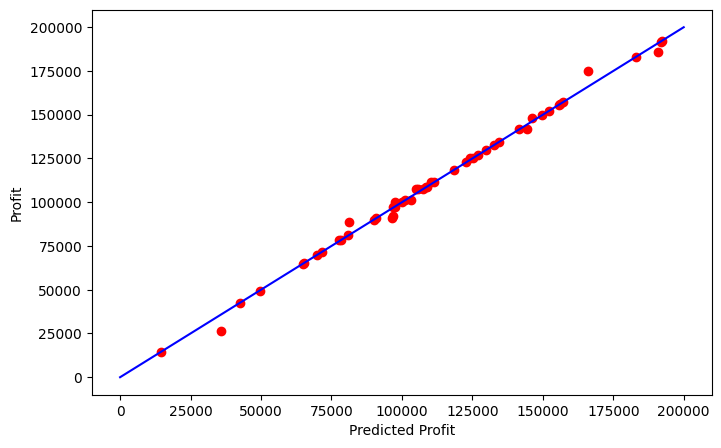

In [92]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8,5))
pl.plot(y, GB_pred1,'ro')
pl.plot([0,200000],[0,200000], 'b-')
pl.xlabel('Predicted Profit')
pl.ylabel('Profit')
pl.show()

### Model comparison

In [93]:
# score comparison of models
frames = [LRMetrics1,GBMetrics1]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.949405,7605.822244,8.055195e+07,8975.073859,0.017708,0.133073
1,GradientBoostingRegressor,0.995714,1170.733333,6.823938e+06,2612.266912,0.002154,0.046407


In [94]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actualvspredicted = pd.DataFrame({"Actual Profit":y,"LR Predicted Profit":LR_pred1, "GB Predicted Profit":GB_pred1})
actualvspredicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
0,192261.830000,171030.654750,192257.915873
1,191792.060000,179425.947499,191789.447945
2,191050.390000,174006.920841,185580.721948
3,182901.990000,170088.234754,182899.601959
4,166187.940000,159596.084671,174999.251961
5,156991.120000,158453.929887,156989.439658
6,156122.510000,156233.053994,156121.016000
7,155752.600000,158809.560293,155751.166067
8,152211.770000,158657.434540,152210.483458
9,149759.960000,159094.342988,149758.849229


**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

##  Conclusion.

In [95]:
# submission of .csv file with final predictions
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictions.csv', index=False)